# Limpeza e Tratativa de Dados

Esse trabalho tem como escopo a limpeza e tratativa dos dados do dataset Global YouTube Statistics que pode ser adquirido no link https://www.kaggle.com/datasets/nelgiriyewithana/global-youtube-statistics-2023.

### Importação de bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import requests

In [8]:
# Criação de uma lista de valores ausentes para apoiar a identificação de valores ausentes.
lista_labels_valores_ausentes = ["n/a", "na", "undefined","unknown", "NaN"]

In [9]:
# Lendo arquivo CSV e inserindo em um DataFrame e identificando valores ausentes
df = pd.read_csv('C:/Users/Maxwell/Downloads/Global YouTube Statistics.csv', na_values = lista_labels_valores_ausentes) 
print("O Dataset tem as seguintes linhas e colunas: ", df.shape)

O Dataset tem as seguintes linhas e colunas:  (995, 28)


In [10]:
#Eliminando valores duplicados
df.drop_duplicates(inplace=True)

In [11]:
#Visualizando percentual de valores ausentes do Dataset
totalCelulas = np.product(df.shape)
contAusentes = df.isnull().sum()
totalAusentes = contAusentes.sum()
print("O dataset pousui", round(((totalAusentes/totalCelulas) * 100), 2), "% de seus valores ausentes.")

O dataset pousui 5.8 % de seus valores ausentes.


In [12]:
# Visão rapida do Dataset
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


# Tratamento de valores ausentes

Antes de nos aprofundarmos na análise do conjunto de dados, é relevante examinar a porcentagem de valores ausentes. Embora o código pudesse ser simplificado com uma linha como a seguinte: print(round((df.isnull().mean()*100), 2)) ou print(round((df.isna().mean() * 100), 2)), optei por empregar uma função personalizada. Essa abordagem resulta em uma tabela mais organizada e de melhor visualização, tornando mais fácil identificar e compreender a presença de dados ausentes em nosso conjunto de dados.

In [57]:
# Função para calcular valores ausentes por coluna, com e sem porcentagem
def func_calc_percent_val_ausent_coluna(df):
    
    valAusent = df.isnull().sum()
    valAusent_percent = 100 * valAusent / len(df)
    valAusent_dtype = df.dtypes
    valAusent_table = pd.concat([valAusent, valAusent_percent, valAusent_dtype], axis=1)
    valAusent_table_ren_columns = valAusent_table.rename(
    columns = {0 : 'Val Ausentes', 1 : '% Val Ausentes', 2: 'Tipo'})
    valAusent_table_ren_columns = valAusent_table_ren_columns[valAusent_table_ren_columns.iloc[:,0] != 0].sort_values('% Val Ausentes', ascending = False).round(2)

    #Retorna o resultado
    if valAusent_table_ren_columns.shape[0] == 0:
        return
    return valAusent_table_ren_columns

In [14]:
# Analisando Contagem de valores ausentes e valores ausentes em porcentagem - Do mais ausente para o menos ausente.
df_valAusent = func_calc_percent_val_ausent_coluna(df)
df_valAusent

,Val Ausentes,% Val Ausentes,Tipo
subscribers_for_last_30_days,337,33.87,float64
Longitude,123,12.36,float64
Gross tertiary education enrollment (%),123,12.36,float64
Latitude,123,12.36,float64
Urban_population,123,12.36,float64
Unemployment rate,123,12.36,float64
Population,123,12.36,float64
Abbreviation,122,12.26,object
Country,122,12.26,object
country_rank,116,11.66,float64


Como uma boa prática, devemos eliminar colunas com mais de 30% de valores ausentes.

### Remoção de coluna com mais de 30% de valores ausentes

In [15]:
#Removendo coluna "subscribers_for_last_30_days"
df.drop("subscribers_for_last_30_days", axis=1, inplace=True)

In [16]:
#Visualização após removação da coluna "subscribers_for_last_30_days"
df_valAusent = func_calc_percent_val_ausent_coluna(df)
df_valAusent

,Val Ausentes,% Val Ausentes,Tipo
Longitude,123,12.36,float64
Gross tertiary education enrollment (%),123,12.36,float64
Latitude,123,12.36,float64
Urban_population,123,12.36,float64
Unemployment rate,123,12.36,float64
Population,123,12.36,float64
Abbreviation,122,12.26,object
Country,122,12.26,object
country_rank,116,11.66,float64
video_views_for_the_last_30_days,56,5.63,float64


Optei por não substituir os valores faltantes nas colunas de Longitude e Latitude por valores centrais ou pelo valor anterior/posterior, a fim de evitar distorções indevidas. Isso se deve ao fato de que o objetivo principal da análise se concentra na análise por país. Portanto, para manter a integridade dos dados e garantir uma análise precisa, tomei a decisão de remover completamente os registros que possuem valores em branco nessas colunas.

É importante notar que, se tivéssemos à disposição uma coluna que indicasse o país correspondente a cada conjunto de coordenadas, seria possível preencher automaticamente os valores de Latitude e Longitude com base no país de origem. No entanto, dado o conjunto de dados atual, a exclusão dos registros incompletos é a abordagem mais apropriada para garantir a validade da análise.

### Removendo linhas do dataset onde duas colunas tenham valores ausentes

In [17]:
#Removendo linhas do dataset onde as colunas Longitude e Latitude tenham valores ausentes
df.dropna(subset=["Longitude", "Latitude"], inplace=True)

In [18]:
#Visualização após limpeza de linhas ausentes das colunas Longitude e Latitude
df_valAusent = func_calc_percent_val_ausent_coluna(df)
df_valAusent

,Val Ausentes,% Val Ausentes,Tipo
category,39,4.47,object
video_views_for_the_last_30_days,22,2.52,float64
channel_type_rank,9,1.03,float64
channel_type,7,0.80,object
created_year,3,0.34,float64
created_month,3,0.34,object
created_date,3,0.34,float64
video_views_rank,1,0.11,float64
country_rank,1,0.11,float64


Pode-se notar que a exclusão dos registros que continham valores ausentes nas colunas de latitude e longitude teve um efeito direto sobre várias outras colunas que também apresentavam valores ausentes.

In [19]:
#Visualizando percentual de valores ausentes do Dataset após tratamentos de exclusão
totalCelulas = np.product(df.shape)
contAusentes = df.isnull().sum()
totalAusentes = contAusentes.sum()
print("O dataset pousui", round(((totalAusentes/totalCelulas) * 100), 2), "% de seus valores ausentes.")

O dataset pousui 0.37 % de seus valores ausentes.


### Tratando variável categórica nula

#### Preenchendo com valor padrão

Poderia ter sido uma alternativa utilizar preenchimento repetindo o mesmo registro não nulo subsequente ou anterior, porém, em linha com as melhores práticas, optei por adotar a estratégia de preenchimento com a palavra 'desconhecido'. Dado que o conjunto de dados está em inglês, a palavra 'unknown' foi escolhida para essa finalidade.

In [20]:
#Visualizar valores únicos da coluna category
print(df["category"].value_counts())

Entertainment            213
Music                    181
People & Blogs           104
Gaming                    81
Comedy                    67
Education                 42
Film & Animation          36
Howto & Style             33
News & Politics           26
Science & Technology      15
Shows                     12
Sports                    11
Pets & Animals             3
Trailers                   2
Autos & Vehicles           2
Nonprofits & Activism      2
Movies                     2
Travel & Events            1
Name: category, dtype: int64


In [21]:
#Substituindo valores ausentes pela palavra Unknown
df["category"].fillna("Unknown", inplace=True)


In [22]:
#Visualizar valores únicos da coluna category para entender como ficou a variavel
print(df["category"].value_counts())

Entertainment            213
Music                    181
People & Blogs           104
Gaming                    81
Comedy                    67
Education                 42
Unknown                   39
Film & Animation          36
Howto & Style             33
News & Politics           26
Science & Technology      15
Shows                     12
Sports                    11
Pets & Animals             3
Trailers                   2
Autos & Vehicles           2
Nonprofits & Activism      2
Movies                     2
Travel & Events            1
Name: category, dtype: int64


In [23]:
# Análise de como ficou o dataset
df_valAusent = func_calc_percent_val_ausent_coluna(df)
df_valAusent

,Val Ausentes,% Val Ausentes,Tipo
video_views_for_the_last_30_days,22,2.52,float64
channel_type_rank,9,1.03,float64
channel_type,7,0.80,object
created_year,3,0.34,float64
created_month,3,0.34,object
created_date,3,0.34,float64
video_views_rank,1,0.11,float64
country_rank,1,0.11,float64


#### Preenchendo com moda

Para lidar com os poucos casos de valores nulos na coluna 'channel_type', onde havia apenas 7 registros faltantes, adotei uma abordagem simples e eficaz. Optei por preencher esses valores ausentes com a moda (valor mais frequente) correspondente a cada categoria de tipo de canal presente no conjunto de dados

In [24]:
# Agrupando o DataFrame por 'category' e calculando a moda de 'channel_type' para cada categoria
moda_por_categoria = df.groupby('category')['channel_type'].apply(lambda x: x.mode()[0])

In [25]:
# Usando a função 'transform' para preencher os valores nulos em 'channel_type' com a moda correspondente à categoria
df['channel_type'].fillna(df['category'].map(moda_por_categoria), inplace=True)


In [26]:
# Análise de como ficou o dataset
df_valAusent = func_calc_percent_val_ausent_coluna(df)
df_valAusent

,Val Ausentes,% Val Ausentes,Tipo
video_views_for_the_last_30_days,22,2.52,float64
channel_type_rank,9,1.03,float64
created_year,3,0.34,float64
created_month,3,0.34,object
created_date,3,0.34,float64
video_views_rank,1,0.11,float64
country_rank,1,0.11,float64


### Análise de variáveis numéricas para imputação

<function matplotlib.pyplot.show(close=None, block=None)>

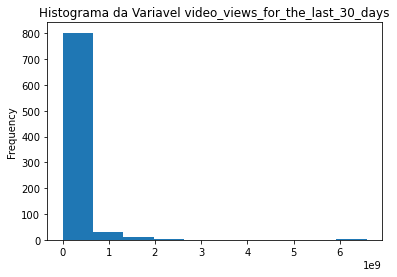

In [27]:
#Analise com gráficos: Histograma para analisar se há distribuição normal na variável video_views_for_the_last_30_days
df.video_views_for_the_last_30_days.plot(kind = "hist")
plt.title("Histograma da Variavel video_views_for_the_last_30_days")
plt.show

#Resultado: Não há uma distribuição normal

C:\Users\Maxwell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Medidas Centrais da Variável video_views_for_the_last_30_days
Média: 182304153.81764707
Mediana: 70915000.0
Moda: 0            1.0
1            4.0
2     26683000.0
3     48947000.0
4    151697000.0
dtype: float64


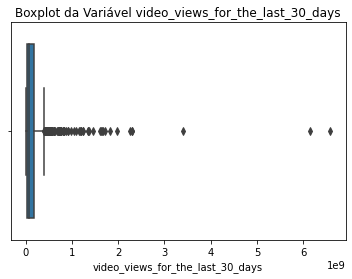

In [28]:
#Analise com gráficos: Boxplot para entender se há outliers na variável video_views_for_the_last_30_days
# como está a distribuição e linha da média.
sns.boxplot(df.video_views_for_the_last_30_days)
plt.title("Boxplot da Variável video_views_for_the_last_30_days")
plt.show
# Calculo das medidas centrais
print("Medidas Centrais da Variável video_views_for_the_last_30_days")
print ("Média: {}".format(df.video_views_for_the_last_30_days.mean()))
print ("Mediana: {}".format(df.video_views_for_the_last_30_days.median()))
print ("Moda: {}".format(df.video_views_for_the_last_30_days.mode()))
# Resultado: Há muitos outliers 
# O melhor caminho é a substituição dos valores ausentes pela Mediana que se mantém inalterada pelos outliers

#### Imputando dados com a Mediana

In [29]:
#Preencher valores ausentes pelo valor da Mediana
df.video_views_for_the_last_30_days.fillna(70915000, inplace = True)

In [30]:
df_valAusent = func_calc_percent_val_ausent_coluna(df)
df_valAusent

,Val Ausentes,% Val Ausentes,Tipo
channel_type_rank,9,1.03,float64
created_year,3,0.34,float64
created_month,3,0.34,object
created_date,3,0.34,float64
video_views_rank,1,0.11,float64
country_rank,1,0.11,float64


Analisando a variavel channel_type_rank

### Imputação com base em informações relacionadas - rank

Ao examinar a distribuição dos dados, ficou evidente que o número de outliers é significativamente alto. Portanto, a utilização da mediana ou moda como medida central pode não ser a escolha mais apropriada, embora ainda sejam opções válidas.

Porém, uma análise mais aprofundada do contexto de negócios revelou que a variável 'channel_type_rank' é estruturada como um ranking, levando em consideração a quantidade de inscritos ('subscribers') por 'channel_type'. Essa consideração específica pode influenciar a decisão sobre como tratar os valores ausentes ou extremos nesse contexto.

Dito isto, optei por preencher a coluna 'channel_type_rank' de acordo com a ordem de inscritos dentro de cada categoria de 'channel_type'.

In [31]:
# Ordenar o DataFrame por 'channel_type' e 'subscribers' em ordem decrescente
df = df.sort_values(by=['channel_type', 'subscribers'], ascending=[True, False])

In [32]:
# Reiniciar o índice do DataFrame para facilitar a atribuição dos valores de ranking
df = df.reset_index(drop=True)

In [33]:
# Criei um dicionário para mapear o ranking com base nas categorias de 'channel_type'
rank_dict = {}
current_channel_type = None
rank = 1

for index, row in df.iterrows():
    if row['channel_type'] != current_channel_type:
        current_channel_type = row['channel_type']
        rank = 1
    df.at[index, 'channel_type_rank'] = rank
    rank += 1

# Agora, a coluna 'channel_type_rank' deve estar preenchida de acordo com a ordem de inscritos dentro de cada categoria de 'channel_type'

In [34]:
# Analise do dataset após a operação.
df_valAusent = func_calc_percent_val_ausent_coluna(df)
df_valAusent

,Val Ausentes,% Val Ausentes,Tipo
created_year,3,0.34,float64
created_month,3,0.34,object
created_date,3,0.34,float64
video_views_rank,1,0.11,float64
country_rank,1,0.11,float64


Eu teria que fazer o mesmo com country rank, mas como posso fazer se não sei qual país o canal pertence?

### Criando a coluna Country com base nas colunas Latitude e Longitude - Geolocalização Reversa

In [49]:
# Função para obter o país com base em latitude e longitude
def get_country(row):
    latitude = row['Latitude']
    longitude = row['Longitude']
    
    # URL de solicitação com um cabeçalho HTTP personalizado para definir a linguagem como inglês, para manter o padrão do df.
    url = f"https://nominatim.openstreetmap.org/reverse?format=json&lat={latitude}&lon={longitude}&accept-language=en"
    
    # solicitação HTTP
    response = requests.get(url)
    # Operação de geolocalização reversa para encontrar os paises.
    if response.status_code == 200:
        data = response.json()
        if 'address' in data and 'country' in data['address']:
            return data['address']['country']
    
    return None  # Retorna None se o país não for encontrado

In [50]:
# Aplicando a função para criar a nova coluna 'country' 
df['country'] = df.apply(get_country, axis=1)
#Obs: A geolocalização reversa é um processo demorado. 

In [51]:
# Visão rapida do Dataset
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,created_month,created_day,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,created_date,country
0,229.0,That Little Puff,23700000,2.028969e+10,Pets & Animals,That Little Puff,769,United States,US,Animals,...,1,29,88.2,328239523.0,14.70,270663028.0,37.090240,-95.712891,29/01/2020,United States
1,304.0,Brave Wilderness,20900000,4.927879e+09,Pets & Animals,Brave Wilderness,982,United States,US,Animals,...,1,8,88.2,328239523.0,14.70,270663028.0,37.090240,-95.712891,08/01/2014,United States
2,689.0,ViralHog,14000000,1.891769e+10,People & Blogs,ViralHog,41117,United States,US,Animals,...,1,22,88.2,328239523.0,14.70,270663028.0,37.090240,-95.712891,22/01/2014,United States
3,599.0,Bayashi TV,14900000,8.615619e+09,Entertainment,������������������BAYASHITV,93,Japan,JP,Autos,...,11,19,63.2,126226568.0,2.29,115782416.0,36.204824,138.252924,19/11/2012,Japan
4,681.0,Supercar Blondie,14100000,5.405563e+09,Autos & Vehicles,Supercar Blondie,855,United Arab Emirates,AE,Autos,...,1,12,36.8,9770529.0,2.35,8479744.0,23.424076,53.847818,12/01/2007,United Arab Emirates


Fazendo o preenchimento por logica de ranking

In [52]:
# Ordenar o DataFrame por 'country' e 'subscribers' em ordem decrescente
df = df.sort_values(by=['country', 'subscribers'], ascending=[True, False])

In [53]:
# Reiniciar o índice do DataFrame para facilitar a atribuição dos valores de ranking
df = df.reset_index(drop=True)

In [54]:
# Imputando
rank_dict2 = {}
current_channel_type2 = None
rank2 = 1

for index, row in df.iterrows():
    if row['country'] != current_channel_type2:
        current_channel_type2 = row['country']
        rank2 = 1
    df.at[index, 'country_rank'] = rank2
    rank2 += 1



In [55]:
df_valAusent = func_calc_percent_val_ausent_coluna(df)
df_valAusent

In [44]:
#video_views_rank é uma variável que está com dados incoerentes e como é irrelevante para as análises futuras, será excluída.
df.drop("video_views_rank", axis=1, inplace=True)

### Usando preenchimento com forward fill (Preenchimento progressivo)

Para lidar com os valores ausentes nas colunas de dia, mês e ano, optei por aplicar a técnica de 'forward fill' (preenchimento progressivo). Isso significa que os valores ausentes foram preenchidos com os valores imediatamente anteriores nas respectivas colunas. Essa abordagem ajuda a manter a continuidade e a coerência dos dados ao longo do tempo, garantindo que as informações de data sejam o mais precisas possível.

#### Tratando tipos de dados - Convertendo mês categórico em numero.

In [35]:
# Convertendo mês categórico em mês numero
meses = {'Jan': 1, 'Fev': 2, 'Mar': 3, 'Abr': 4, 'Mai': 5, 'Jun': 6, 'Jul': 7, 'Ago': 8, 'Set': 9, 'Out': 10, 'Nov': 11, 'Dez': 12}
df['created_month'] = df['created_month'].map(meses)
df['created_month'] = df['created_month'].fillna(1).astype(int)  # Preencha os valores nulos com 1, se necessário

#### Preenchimento progressivo

In [37]:
def preencher_nulos_com_anterior(df, coluna):
    df[coluna] = df[coluna].fillna(method='ffill')
    return df

In [38]:
df = preencher_nulos_com_anterior(df,"created_date")
df = preencher_nulos_com_anterior(df,"created_year")

In [39]:
# Convertendo tudo para INT
df['created_date'] = df['created_date'].astype(int)
df['created_month'] = df['created_month'].astype(int)
df['created_year'] = df['created_year'].astype(int)

## Criando coluna de data "Dia/Mês/Ano" com base nas colunas separadas.

In [40]:
#função para concatenar e criar a coluna
def criar_coluna_date(df):
    df['date'] = pd.to_datetime(df['created_year'].astype(str) + '-' + df['created_month'].astype(str) + '-' + df['created_date'].astype(str), format='%Y-%m-%d')
    df['date'] = df['date'].dt.strftime('%d/%m/%Y')
    return df

In [41]:
#criando a coluna
df = criar_coluna_date(df)

In [47]:
#Renomeando created_date para created_day a fim de não gerar confusão.
df = df.rename(columns={'created_date': 'created_day'})
#Renomeando date para created_date
df = df.rename(columns={'date': 'created_date'})

## Para finalizar, reorganizei o Rank

Após implementar várias modificações no conjunto de dados, tomei a decisão de reorganizar o ranking com base nas informações contidas no próprio dataset. Essa escolha foi guiada por considerações de negócios e pela necessidade de refletir com precisão as classificações e prioridades com base nos dados atualizados. 

In [42]:
# Use rank() para classificar os valores em 'subscribers' e atualizar 'rank' com as classificações
df['rank'] = df['subscribers'].rank(ascending=False, method='min')


In [45]:
df_valAusent = func_calc_percent_val_ausent_coluna(df)
df_valAusent

,Val Ausentes,% Val Ausentes,Tipo
country_rank,1,0.11,float64


In [48]:
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,created_year,created_month,created_day,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,created_date
0,229.0,That Little Puff,23700000,2.028969e+10,Pets & Animals,That Little Puff,769,United States,US,Animals,...,2020,1,29,88.2,328239523.0,14.70,270663028.0,37.090240,-95.712891,29/01/2020
1,304.0,Brave Wilderness,20900000,4.927879e+09,Pets & Animals,Brave Wilderness,982,United States,US,Animals,...,2014,1,8,88.2,328239523.0,14.70,270663028.0,37.090240,-95.712891,08/01/2014
2,689.0,ViralHog,14000000,1.891769e+10,People & Blogs,ViralHog,41117,United States,US,Animals,...,2014,1,22,88.2,328239523.0,14.70,270663028.0,37.090240,-95.712891,22/01/2014
3,599.0,Bayashi TV,14900000,8.615619e+09,Entertainment,������������������BAYASHITV,93,Japan,JP,Autos,...,2012,11,19,63.2,126226568.0,2.29,115782416.0,36.204824,138.252924,19/11/2012
4,681.0,Supercar Blondie,14100000,5.405563e+09,Autos & Vehicles,Supercar Blondie,855,United Arab Emirates,AE,Autos,...,2007,1,12,36.8,9770529.0,2.35,8479744.0,23.424076,53.847818,12/01/2007


# Salvando trabalho - Conclusão

In [56]:
df.to_csv('C:/Users/Maxwell/Downloads/Global YouTube Statistics_TRATADO.csv')